<script>
    console.log("Hello. You'll see this printed in your browser's DevTools / Console. Feel free to delete this line.");
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 1.1 !important; }</style>';
</script>

# Using Python for Mathematical Modelling: An Application

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/beertino/2024_SIMC/blob/main/SIMC2024_Tennis.ipynb)

<p align='left'> Link to files: https://for.edu.sg/simc2024tennis </p>

<p align='right'>BEERTINO ROMEROW WOE</p>

<p align='right'>NATIONAL JUNIOR COLLEGE</p>

# QR Code to the Notebook

<center>

<img src="./img/qrcode_github.com.png" width="500" align="center">

<p align='center'> https://for.edu.sg/simc2024tennis </p>

</center>



# 0. Singapore Mathematics Framework

Singapore Mathematics Framework is a feature of Singapore mathematics curriculum which has a central focus of using mathematics to solve problems. It sets the direction for and provides guidance in the teaching, learning and assessment of mathematics from primary level to pre-universities.

<center>

<figure>
  <img src="./img/singapore_math_framework.png" width="800" align="center">
  <figcaption>Fig 0.0 Singapore Mathematics Framework</figcaption>
</figure>    

</center>

The framework stresses conceptual understanding, skills proficiency and mathematical processes, and gives due emphasis to  attitudes and metacognition.

In particular, under mathematical processes, we find the process skills of applications and modelling which allow students to connect mathematics that they have learnt to the real world.

## 0.1 Mathematical Modelling
Mathematical modelling is the process of formulating and improving a mathematical model to represent and solve real-world problems. A mathematical model is a mathematical representation or idealisation of a real-world situation. It can be a complicated as a system of equations or as simple as a geometrical figure. It shares characteristics of the real-world situation that it seeks to represent.

<center>

<figure>
  <img src="./img/math_modelling_process.png" width="450" align="center">
  <figcaption>Fig 0.1. Math Modelling process</figcaption>
</figure>    

</center>

# 1. Real World Problem: The Deuce Problem

A tennis game consists of a sequence of points played with the same player serving. A game is won by the first side to win at least four points and have a margin of two points or more over their opponent.

When each player has won three points, the score is called as "deuce". From that point on in the game, whenever the score is tied, it is described as "deuce" regardless of how many points have been played.

In standard play, scoring beyond a "deuce" score, in which the players have scored three points each, requires that one player must get two points ahead in order to win the game. This type of tennis scoring is known as "advantage scoring" (or "ads"). The side that wins the next point after deuce is said to have the advantage. If they lose the next point, the score is again deuce, since the score is tied. If the side with the advantage wins the next point, that side has won the game, since they have a lead of two points. When the server is the player with the advantage, the score may be called as "advantage in".

> **Problem:**
>
> If Novak Djokovic (ATP Rank 1) plays Jannik Sinner (ATP Rank 2) in a game starting at a deuce, who will win the game?

<center>

<figure>
  <img src="./img/sinner_vs_djokovic.png" width="500" align="center">
  <figcaption>Fig 1.1 Jannik Sinner vs Novak Djokovic</figcaption>
</figure>    

</center>

## 1.1 Analyzing the Problem
We can restate the description of winning a game from a deuce situation in the **Structured English** format.

```
00 DJOKOVIC WINS GAME FROM DEUCE
01 IF DJOKOVIC beats SINNER THEN      #FIRST POINT WON BY DJOKOVIC
02    IF DJOKOVIC beats SINNER THEN   #TWO CONSECUTIVE WIN BY DJOKOVIC
03      DJOKOVIC wins
04    ELSE                            #DJOKOVIC LOSES SECOND POINT
05      restarts from deuce
06    ENDIF
07 ELSE                               #DJOKOVIC LOSES FIRST POINT
08    IF DJOKOVIC beats SINNER THEN   #DJOKOVIC WINS SECOND POINT
09      restarts from deuce
10    ELSE                            #TWO CONSECUTIVE LOSSES BY DJOKOVIC
11      DJOKOVIC loses
12 ENDIF
```

The objective is to **predict the winner** between Djokovic and Sinner.

## 1.2 Using Diagram for Analysis

<center>

<figure>
  <img src="./img/tree_diagram.drawio.png" width="500" align="center">
  <figcaption>Fig 1.2. State Dragram for the Deuce Situation</figcaption>
</figure>    

</center>

# 2. A Naive Solution

## 2.1 Making Assumptions
- It's too complicated. Let's just toss a coin.
- If heads, Djokovic wins the game. Otherwise, Sinner wins.

## 2.2 Implement the Computer Model

In [6]:
def coin_toss():
  import random  # Import the random module to use its randint function.
  # Let 0 represent tails and 1 represent heads.
  return random.randint(0,1)  # Return a random integer between 0 and 1.

def djokovic_wins_the_game():
  coin = coin_toss()  # Call the coin_toss function and store the result in 'coin'.
  if coin == 1:  # If the result of the coin toss is 1 (heads).
    return True  # Return True indicating Djokovic wins the game.
  else:
    return False  # Return False indicating Djokovic loses the game.

## 2.3 Model Verification I
- Model grossly oversimplify things. Result is dependent on a single toss.
- Possible modification. What if each individual point is determined by an individual toss?
- Go back to 2.1 and continue with 2.2


```
00 DJOKOVIC WINS GAME FROM DEUCE
01 IF DJOKOVIC beats SINNER THEN      #FIRST POINT WON BY DJOKOVIC
02    IF DJOKOVIC beats SINNER THEN   #TWO CONSECUTIVE WIN BY DJOKOVIC
03      DJOKOVIC wins
04    ELSE                            #DJOKOVIC LOSES SECOND POINT
05      restarts from deuce
06    ENDIF
07 ELSE                               #DJOKOVIC LOSES FIRST POINT
08    IF DJOKOVIC beats SINNER THEN   #DJOKOVIC WINS SECOND POINT
09      restarts from deuce
10    ELSE                            #TWO CONSECUTIVE LOSSES BY DJOKOVIC
11      DJOKOVIC loses
12 ENDIF
```

In [7]:
def djokovic_wins_a_point(): #This is basically a renaming of the previous function
  coin = coin_toss()  # Call the coin_toss function and store the result in 'coin'.
  if coin == 1:  # If the result of the coin toss is 1 (heads).
    return True  # Return True, indicating Djokovic wins the point.
  else:
    return False  # Return False, indicating Djokovic loses the point.

```
00 DJOKOVIC WINS GAME FROM DEUCE
01 IF DJOKOVIC beats SINNER THEN      #FIRST POINT WON BY DJOKOVIC
02    IF DJOKOVIC beats SINNER THEN   #TWO CONSECUTIVE WIN BY DJOKOVIC
03      DJOKOVIC wins
04    ELSE                            #DJOKOVIC LOSES SECOND POINT
05      restarts from deuce
06    ENDIF
07 ELSE                               #DJOKOVIC LOSES FIRST POINT
08    IF DJOKOVIC beats SINNER THEN   #DJOKOVIC WINS SECOND POINT
09      restarts from deuce
10    ELSE                            #TWO CONSECUTIVE LOSSES BY DJOKOVIC
11      DJOKOVIC loses
12 ENDIF
```

In [8]:
# Implement the code based on the structured English.
def djokovic_wins_the_game():
  if djokovic_wins_a_point():  # First condition to check if Djokovic wins a point.
    if djokovic_wins_a_point():  # Check again if Djokovic wins another point.
      return True  # If he wins two consecutive points, he wins the game.
    else:
      return djokovic_wins_the_game()  # If he wins the first but loses the second point, returns to deuce
  else:
    if djokovic_wins_a_point():  # If he loses the first point but wins the second.
      return djokovic_wins_the_game()  # Reevaluate the game.
    else:
      return False  # If he loses two consecutive points, he loses the game.

## 2.4 Model Verification II
- The coin toss is (assumed) going to give 50% head and 50% tails on average.
- Since tennis players have differing ability, perhaps the outcome of a point shouldn't be that balanced.
- Possible modification. What if the outcome of the point has some imbalance in the number of wins or losses obtained on average. In other words, what if the probability of winning a point by Djokovic is the value $p$ where $0 \leq p \leq 1$?
- Using Probability Model

Go back to 2.1 and continue with 2.2

In [9]:
def djokovic_wins_a_point(p):
  import random  # Import the random module to access the random number generator.
  if random.random() < p:
    # random.random() generates a float between 0.0 and 1.0. If this value is less than 'p',
    # it indicates a successful outcome based on the probability 'p'.
    return True  # Return True if Djokovic wins the point.
  else:
    return False  # Return False if Djokovic loses the point.

In [10]:
# Implement the code based on the structured English.
def djokovic_wins_the_game(p):
  if djokovic_wins_a_point(p):  # Check if Djokovic wins a point.
    if djokovic_wins_a_point(p):  # Check again if Djokovic wins another point immediately after.
      return True  # If both checks are true, Djokovic wins the game.
    else:
      # If the first check is true but the second check is false, recurse to reevaluate the game outcome.
      return djokovic_wins_the_game(p)
  else:
    # If the first check is false, check again if Djokovic can win the next point.
    if djokovic_wins_a_point(p):
      # If the second point is won after losing the first, recurse to reevaluate the game outcome.
      return djokovic_wins_the_game(p)
    else:
      # If both the first and second checks are false, Djokovic loses the game.
      return False

## 2.5 Model Validation
- Get some data
- According to [Tennis Statistics](https://www.ultimatetennisstatistics.com/headToHead?playerId1=4920&playerId2=50810&tab=matches&outcome=played#matchStats-182171Return), Djokovic played Sinner for the first time in the tour in 2021, where Djokovic won $72$ out of $130$ points. So, we assume  $p=\frac{72}{130}=0.554$ as an approximation of probability that he won a point
- Simulate 1000 deuce games to find approximation of the probability of Djokovic winning the game
- Now, we have probably a better prediction

In [11]:
# Simulation to approximate the probability
win_count = 0  # Initialize a counter to track the number of games Djokovic wins.
no_of_games = 100000  # Set the total number of games to simulate.

for _ in range(no_of_games):  # Loop through a range equal to the number of games.
  if djokovic_wins_the_game(0.554):  # Call the function to determine if Djokovic wins a game.
    win_count += 1  # Increment the win counter if Djokovic wins the game.

print(win_count/no_of_games)  # Calculate and print the proportion of games Djokovic wins.


0.60669


## 2.6 Caveat
- $0.554$ is from a single match and need not be representative from points in a deuce game

# 3. Return to the Diagram

## 3.1 Probability Tree Diagram
- So, $p$ is the probability of Djokovic winning a point

<center>

<figure>
  <img src="./img/probability_tree.drawio.png" width="375" align="center">
  <figcaption>Fig 3.1 Probability Tree Dragram for the Deuce Situation</figcaption>
</figure>    

</center>


## 3.2 The Recursive Equation

Consider the following events
- $D$ : Djokovic wins the game from deuce
- $W_i$ : Djokovic wins the $i$ th point from deuce
- $L_i$ : Djokovic loses the $i$ th point from deuce

Based on the probability tree, we have the following equation

$$\begin{align}
P(D)	&=P\left(W_{1}W_{2}\right)+P\left(W_{1}L_{2}D\right)+P\left(L_{1}W_{2}D\right) \\
P\left(D\right)	&=p\cdot p+p\left(1-p\right)P\left(D\right)+\left(1-p\right)pP\left(D\right)\\
P\left(D\right)\left(1-2p\left(1-p\right)\right)	&=p^{2}\\
P\left(D\right)	&=\frac{p^{2}}{1-2p\left(1-p\right)}
\end{align}
$$

In [12]:
# Probability of Djokovic winning from deuce is a function of p
def prob_winning(p):
  return p**2/(1-2*p*(1-p))
p = 0.554
print(prob_winning(p))

0.6067548118742982


Actually, we don't have to solve the equation obtained manually. Python can solve it for us 😏

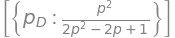

In [13]:
from sympy import *

p, p_D = symbols('p,p_D')

init_printing()

display(solve(Eq(p_D,p**2+p*(1-p)*p_D+(1-p)*p*p_D)))

## 3.3 Probability of Djokovic Winning
- We plot the graph if the function obtained above


In [ ]:
# plotting f(p) = p**2/(1-2*p*(1-p)
from sympy import symbols
from sympy.plotting import plot

p = symbols('p')
p1 = plot(p**2/(1-2*p*(1-p)), show=False, xlim = (0,1), ylim = (0,1))
p2 = plot(p, show=False, xlim = (0,1))

p1.extend(p2)
p1.show()

<center>

<figure>
  <img src="./img/output.png" width="500" align="center">
  <figcaption>Fig 3.2 graph of $y=f(p)$ and $y=p$</figcaption>
</figure>    

</center>

- Observe that
  - graph has an inflection point at $p=0.5$
  - graph is concave upwards on $(0,0.5)$
  - graph is convave downwards on $(0.5,1)$

This implies that the player that have the higher probability of winning a point will have an advantage in winning the game from deuce.

## 3.4 OK, I'm actually cheating
- the equation below holds because I'm assuming that winnning a prior point has no effect on the probability of the winning following point, i.e the events are independent 😆

$$\begin{align}
P\left(D\right)	&=p^{2}+p\left(1-p\right)P\left(D\right)+\left(1-p\right)pP\left(D\right)\\
\end{align}
$$

# 4. Improving the Model
- what if we want to consider the effect of winning/losing points towards the subsequent probabilities? Let us look at the probability tree again.

<center>

<figure>
  <img src="./img/probability_tree_conditional.drawio.png" width="375" align="center">
  <figcaption>Fig 4.1 Adjusted probability on the tree</figcaption>
</figure>    

</center>

The equation becomes

$$\begin{align}
P\left(D\right) &=p_{w}p_{ww}+p_{w}\left(1-p_{ww}\right)P\left(D\right)+\left(1-p_{w}\right)p_{lw}P\left(D\right)
\end{align}
$$

### 4.1 Combining into a function

In [ ]:
def approximate_winning_probability(no_of_games):
  from itertools import starmap  # Import starmap to apply a function to arguments unpacked from a list of tuples.

  win_count = 0  # Initialize a counter to track the number of games Djokovic wins.

  def djokovic_wins_the_game(p_w, p_ww, p_lw):
    def djokovic_wins_a_point(p):
      import random  
      if random.random() < p:
        return True  
      else:
        return False  

    # Check if Djokovic wins the first point with probability p_w.
    if djokovic_wins_a_point(p_w):
      # If the first point is won, check if he wins the second point with probability p_ww.
      if djokovic_wins_a_point(p_ww):
        return True  # Return True, Djokovic wins the game after winning two consecutive points.
      else:
        # If the second point is lost, recursively determine the game outcome starting as if the first point was won.
        return djokovic_wins_the_game(p_w, p_ww, p_lw)


In [ ]:
    else:
      # If the first point is lost, check if he wins the next point with probability p_lw.
      if djokovic_wins_a_point(p_lw):
        # If the next point is won after losing the first, recursively determine the game outcome starting as if the first point was lost.
        return djokovic_wins_the_game(p_w, p_ww, p_lw)
      else:
        return False  # Return False, Djokovic loses the game after losing two consecutive points.

  # Define probabilities of winning a point after winning the previous point (p_ww) and losing the previous point (p_lw).
  p_w  =  0.554
  p_ww =  0.554 + 0.1  # Increase the probability by 0.1 if the previous point was won.
  p_lw =  0.554 - 0.1  # Decrease the probability by 0.1 if the previous point was lost.

  param = [(p_w, p_ww, p_lw)]  # Create a list of parameter tuples for starmap.

  # Loop through the specified number of games.
  for _ in range(no_of_games):
    # Use starmap to apply djokovic_wins_the_game to each tuple in param.
    # Check the game result and increment the win counter if True.
    if list(starmap(djokovic_wins_the_game, param))[0]:
      win_count += 1

  return win_count/no_of_games  # Return the proportion of games won by Djokovic.

# Call the function to simulate 10,000 games.
approximate_winning_probability(10000)

In [ ]:
0.602

## 4.2 Now with more params!
- Better, but does the probabilities in the parameter need to be predetermined?
- Can we quantify some player attributes and make them relevant in the computation?
  - For example, both Djokovic and Sinner has some attributes like strength, agility and stamina which could determine how the probability is computed
  - We could also have another attribute luck to further influence the outcome

### 4.3 Submodel for Winning Probability
Let $x_i$, $y_i$, $z_i$ be the strength, agility and stamina values of Player $i$. We define the *player score* $S_i$ of Player $i$ to be simply the sum of the values, i.e. $$S(x_i,y_i,z_i)= x_i+y_i+z_i.$$

Together with the logistic function, we can define the probability of player $i$ defeating player $j$ as $$P(\text{Player i} > \text{Player j}) = \frac{1}{1+e^{S_j-S_i}}$$



### 4.4 OK. ChatGPT. Help me out.

- Novak Djokovic
  - Strength (STR): Djokovic isn't known primarily for his sheer power; instead, he is known for his incredible ability to return and sustain rallies. However, his service and groundstrokes are very effective. We might rate him as: STR: 85/100
  - Agility (AGI): One of Djokovic's defining traits is his exceptional agility. His ability to reach and return shots that most players would miss is unparalleled. AGI: 95/100
  - Stamina (STAM): Djokovic is famous for his endurance and his capability to play intensely long matches without a significant drop in performance. His stamina is likely one of the highest on the tour. STAM: 98/100



- Jannik Sinner
  - Strength (STR): Sinner is known for his powerful groundstrokes, especially his forehand. He can generate significant speed on his shots, which would translate to a high strength rating. STR: 90/100
  - Agility (AGI): While agile, Sinner is not quite at Djokovic’s level but still moves exceptionally well across the court. His agility allows him to maintain a strong offensive and defensive game. AGI: 88/100
  - Stamina (STAM): Sinner is young and fit, capable of enduring long matches, but his experience and ability to manage energy in prolonged contests are still developing compared to Djokovic. STAM: 85/100

In [ ]:
class Player:
  def __init__(self, str, agi, stam):
    self.str = str  # Player's strength attribute
    self.agi = agi  # Player's agility attribute
    self.stam = stam  # Player's stamina attribute

  def get_player_score(self):
    # Calculate the total score by summing strength, agility, and stamina
    return self.str + self.agi + self.stam

  def win_probability_against(self, Player):
    import math  # Import math module for the exponential function
    # Calculate win probability using the logistic function
    return 1 / (1 + math.exp(Player.get_player_score() - self.get_player_score()))

def approximate_winning_probability(no_of_games):
  from itertools import starmap  # Import starmap for applying a function over a list of tuples

  win_count = 0  # Counter for the number of wins

  def djokovic_wins_the_game(p_w, p_ww, p_lw):
   
    def djokovic_wins_a_point(p):
      import random  
      if random.random() < p:
        return True  
      else:
        return False  


In [ ]:
    # Simulate game logic with different probabilities based on game situation
    if djokovic_wins_a_point(p_w):
      if djokovic_wins_a_point(p_ww):
        return True  # Wins the game after winning two consecutive points
      else:
        return djokovic_wins_the_game(p_w, p_ww, p_lw)
    else:
      if djokovic_wins_a_point(p_lw):
        return djokovic_wins_the_game(p_w, p_ww, p_lw)
      else:
        return False  # Loses the game after losing two consecutive points

  # Create player instances with different stats
  djokovic = Player(85,95,98)
  sinner = Player(90,88,85)
  p_w = djokovic.win_probability_against(sinner)  # Probability of winning after a neutral situation

  djokovic = Player(85,95,95)
  sinner = Player(90,88,80)
  p_ww = djokovic.win_probability_against(sinner)  # Probability of winning after winning a point

  djokovic = Player(85,95,85)
  sinner = Player(90,88,70)
  p_lw = djokovic.win_probability_against(sinner)  # Probability of winning after losing a point


In [ ]:
  param = [(p_w, p_ww, p_lw)]

  # Simulate the specified number of games
  for _ in range(no_of_games):
    if list(starmap(djokovic_wins_the_game, param))[0]:
      win_count += 1

  return win_count/no_of_games  # Return the proportion of wins

approximate_winning_probability(10000)  # Call the function to simulate 10,000 games

In [ ]:
1.0

## 4.3 Djokovic the GOAT

- what went wrong?
  - probability given logistic function is near 1 for Djokovic winning a point
  
<center>

<figure>
  <img src="./img/king_djokovic.png" height="350" align="center">
  <figcaption>Fig 4.2 Djokovic with his Rolex crown</figcaption>
</figure>    

</center>


In [5]:
class Player:
  def __init__(self, str, agi, stam):
    self.str = str
    self.agi = agi
    self.stam = stam

  def get_player_score(self):
    return self.str + self.agi + self.stam

  def win_probability_against(self, Player):
    import math

    return 1/(1 + math.exp(Player.get_player_score() - self.get_player_score()))

djokovic = Player(85,95,98)

sinner = Player(90,88,85)

print(djokovic.win_probability_against(sinner))

print(sinner.win_probability_against(djokovic))

0.999999694097773
3.059022269256247e-07


## 4.4 Too Deep Into the Rabbit Hole
1. What we could do to improve the model:
  - Adjust the player score function to maybe $$S(x_i,y_i,z_i)= w_1x_i+w_2y_i+w_3z_i.$$ I.e., we can add weights to each stats
  - use a more generalized logistic function $$P(\text{Player i} > \text{Player j}) = \frac{1}{1+e^{a+b(S_j-S_i)}}$$
  - adjust $w_1, w_2, w_3, a$ and $b$ such that it aligns better with real-world statistics
  - player stats can have depreciation to mimic fatigue
2. Repeat until we feel it's satisfactory.

# 5. Model Timeline
1. Single Fair Coin toss to determine outcome of the game
2. Multiple Fair Coin tosses to determine outcome of the game
3. Using real-world statistics to use as probability of winning
4. Using conditional probabilities in different scenario
5. Modelling probability of winning with logistic function and OOP

# 6. Final Word: What Can Python Offer In the Context of Mathematical Modelling
1. Relatively easy implementation of the mathematical ideas due to similar syntax
2. Simulation Capabilities with or without OOP
    - Section 4.1 without OOP
    - Section 4.2 with OOP
3. Computer Algebraic System to solve algebraic equations with `sympy` module
    - Section 3.2
4. Drawing Diagram and Plots
    - Section 3.3

# 7. Further Explorations
- predict the outcome of the game from `0-0`
- predict the winner from a tournament of $n$ players

## 8. The End

<p align='center'> Thank you </p>

# References
1. Tennis Scoring System: https://en.wikipedia.org/wiki/Tennis_scoring_system Retrieved: 18/04/24
2. ATP Ranking: https://www.atptour.com/en/rankings/singles Retrieved: 18/04/24
3. Introduction to Modeling and Simulation with Matlab and Python. Steve I. Gordon and Brian Guifoos. Figure 1.2 Major steps in the modeling process. Page 11